# (Mini-project) Data Analysis

## Importing Necessary Libraries

In [1104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [1105]:
custom_na_values = ['NA']
data = pd.read_csv("university_enrollment_(Mini-project-01).csv",na_values=custom_na_values,keep_default_na=False)

## Exploring Data

### Data Columns

In [1106]:
data.columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department'],
      dtype='object')

### Datatypes Of Data Columns

In [1107]:
data.dtypes

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

### Size Of Data

In [1108]:
len(data)

1850

There are total 1850 records in the dataset.

### First 5 Rows

In [1109]:
data.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


### Last 5 Rows

In [1110]:
data.tail()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math
1849,1850,online,2017,256,17.57,72.0,None,Math


### Data Summary

In [1111]:
data.describe()


,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


### Checking Data For Null Or Missing Values

In [1112]:
data.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

There are 185 missing values in column 'post_score' and 89 missing values in column 'pre_requirement'.

## Fixing and Cleaning Data

### Converting Columns to Numeric Datatypes

In [1113]:
print(f'There are {data[data['pre_score']=='-']['pre_score'].count()} dash (-) Values')
# While converting pre_score to numeric datatype i came to know that there are 130 dash(-) values in column 'pre_score'.
#  I am converting each dash with 0.
#  After converting it to numeric then i will convert 0 with mean of pre_score

data['pre_score'] = data['pre_score'].replace('-',0)


# Converting pre_score column to float
data['pre_score'] = pd.to_numeric(data['pre_score'])

# Replacing 0 in pre_score column wit the mean of pre_score
data['pre_score'] = data['pre_score'].replace(0,data['pre_score'].mean())



There are 130 dash (-) Values


### Converting Math to Mathematics

In department column , Math and Mathematics defined differently but they are the same . So here i am changing the Math to Mathematics 

In [1115]:
data['department'] = data['department'].replace('Math','Mathematics')


### Checking For Duplicates


In [1116]:

print(f"There are {data.duplicated().sum()} duplicates")

There are 0 duplicates


### Applying Label Encoding On pre_requirement column

In [1117]:
data['pre_requirement']=data['pre_requirement'].fillna("Unknown")
data['pre_requirement']=data['pre_requirement'].map({"Unknown":0,"None":1,"Beginner":2,"Intermediate":3})

In [1118]:
data['pre_requirement'].unique()

array([2, 1, 0, 3])

### Filling The Missing Values in post_score column

In [1119]:
data['post_score'].fillna(data['post_score'].mean(),inplace=True)

C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_8760\2037991431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['post_score'].fillna(data['post_score'].mean(),inplace=True)


### Seperating Numeric Data


In [1120]:
numericData = data.select_dtypes('number')

### Checking if there are any missing values remaining

In [1121]:
data.isnull().sum()


course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

## Data Analysis

## Basic Analysis

### How Many Unique Courses are there ?

In [1122]:
data['course_id'].unique()

array([   1,    2,    3, ..., 1848, 1849, 1850])

There are 1850 unique courses in the dataset

### What is the total number of enrollments across all courses?

In [1123]:
print(f"There are total {data['enrollment_count'].sum()} enrollments across all courses")

There are total 428396 enrollments across all courses


### What is the average enrollment count for all courses?

In [1124]:
print(f" The Average Of Enrollment Count For All Courses is {data['enrollment_count'].mean()}")


 The Average Of Enrollment Count For All Courses is 231.56540540540541


### What is the maximum enrollment count for a single course and which course is this?


In [1125]:
data[data['enrollment_count']==data['enrollment_count'].max()]

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
461,462,online,2013,267,30.05,70.0,1,Engineering
1007,1008,online,2018,267,48.28,80.0,1,Engineering
1510,1511,online,2014,267,3.15,69.0,1,Engineering


The Engineering department offer the highly enrolled courses.The important thing to remember that all the 3 courses are online. 

### What is the minimum enrollment count for a single course and which course is this?


In [1126]:
data[data['enrollment_count']==data['enrollment_count'].min()]

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
920,921,classroom,2019,154,70.38,75.204805,3,Science


## Enrollment Analysis

### Which year had the highest total enrollment count?

In [1127]:
yearlyCount = data.groupby('year')['enrollment_count'].sum().sort_values(ascending=False)
yearlyCount


year
2013    38897
2012    38463
2016    37507
2015    36910
2021    36840
2018    36477
2022    35118
2014    34344
2011    34109
2017    33550
2019    33485
2020    32696
Name: enrollment_count, dtype: int64

### Plotting

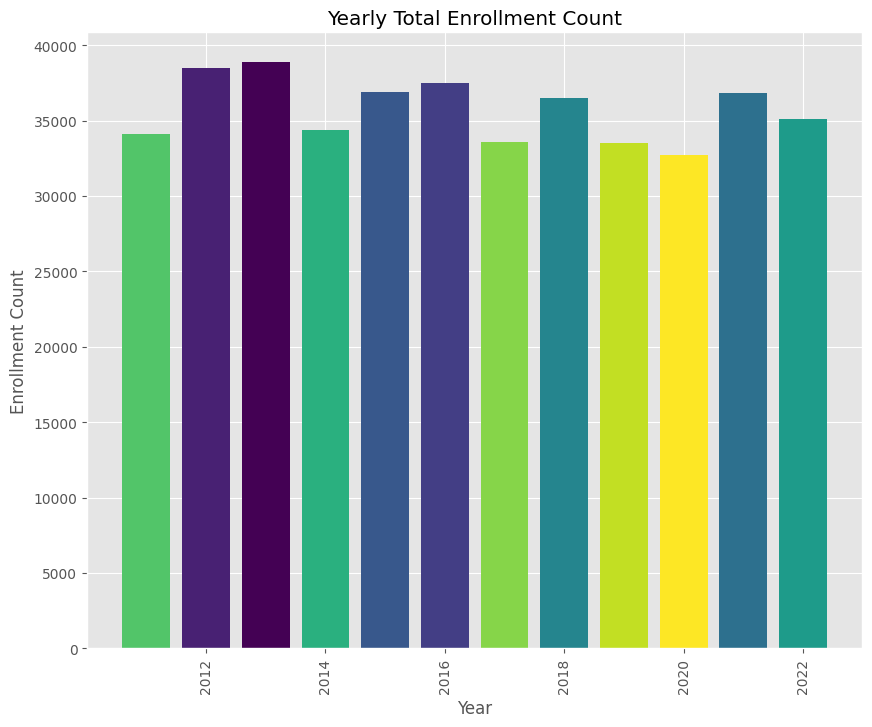

In [1128]:



# Plotting the bar chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = plt.cm.viridis(np.linspace(0, 1, len(yearlyCount)))

plt.bar(yearlyCount.index, yearlyCount.values,color = colors)
plt.xticks(rotation=90)

plt.title("Yearly Total Enrollment Count")
plt.ylabel("Enrollment Count")
plt.xlabel("Year")

plt.show()



#### Intepretation

2013 had the highest enrollment with count of 38897 enrollments . The lowest enrollment count was in 2020,with 32696 enrollments. The Bar Plot shows that peak in 2013 and dip in 2020

### Which department has the highest average enrollment count?

In [1129]:
departmentCount = data.groupby("department")['enrollment_count'].mean().sort_values(ascending=False)
departmentCount


department
Technology     248.397775
Mathematics    234.456818
Science        213.076271
Engineering    210.342466
Name: enrollment_count, dtype: float64

### Plotting

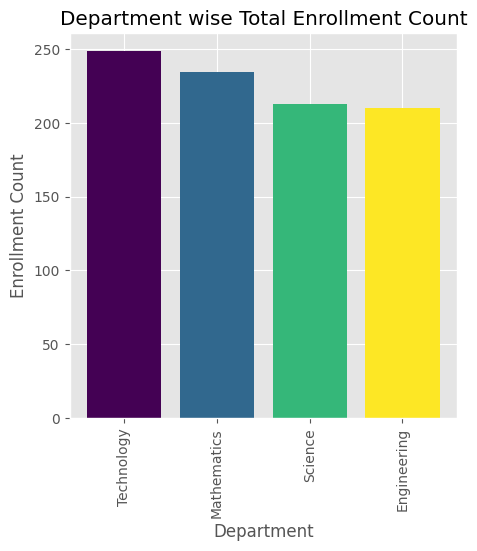

In [1130]:

#Plotting the bar chart

plt.style.use('ggplot')
plt.figure(figsize=(5, 5))

colors = plt.cm.viridis(np.linspace(0, 1, len(departmentCount)))

plt.bar(departmentCount.index, departmentCount.values,color = colors)
plt.xticks(rotation=90)

plt.title("Department wise Total Enrollment Count")
plt.ylabel("Enrollment Count")
plt.xlabel("Department")

plt.show()



#### Intepretation
Technology department has highest average enrollment count (248.80)

### What is the enrollment count for each course type ('classroom' and 'online')?

In [1131]:
courseCount = data.groupby('course_type')['enrollment_count'].sum().sort_values(ascending=False)
print(f"There are {courseCount['online']} enrollment in online courses")
print(f"There are {courseCount['classroom']} enrollment in classromm courses")


There are 347442 enrollment in online courses
There are 80954 enrollment in classromm courses


### Plotting

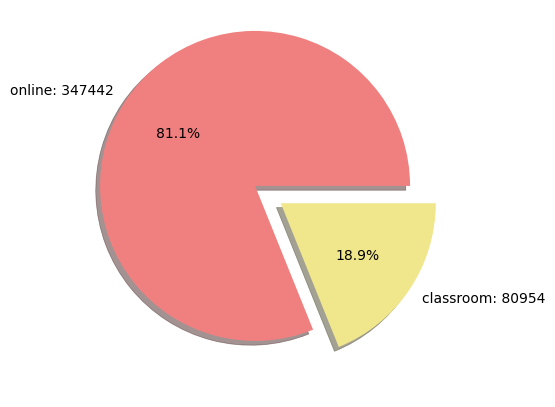

In [1132]:
# Plotting Pie Chart
plt.figure(figsize=(5,8))
plt.pie(courseCount.values,
    labels=[f"{course}: {count}" for course,count in zip (courseCount.keys(),courseCount.values)],
    autopct="%1.1f%%",
    shadow=True,
    explode=(0.2,0),
    colors=["lightcoral", "khaki"])
plt.show()

#### Intepretation

The pie chart shows that 81.1% enrollment are in online courses and 18.9% enrollments are in classroom courses

### What percentage of courses have an enrollment count greater than 200?

The Percentage of enrollment count greater than 200 is 74.32432432432432


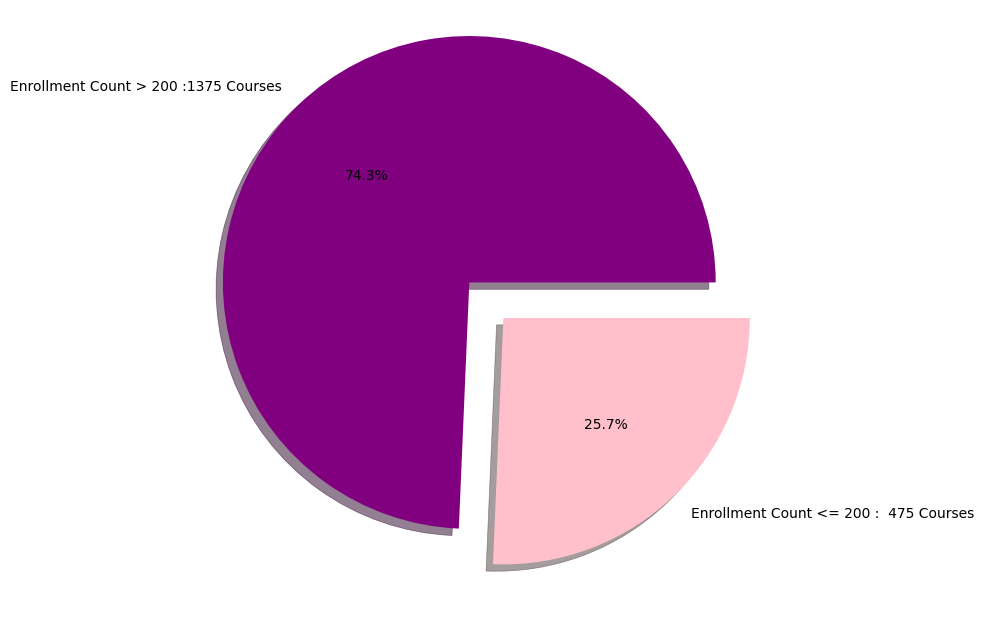

In [1133]:
countGT200 = data[data['enrollment_count']>200]

# Percentage of courses with enrollment count greater than 200

percentageGT200 = (len(countGT200)/len(data)) * 100
print(f"The Percentage of enrollment count greater than 200 is {percentageGT200}")

#Plotting pie chart

plt.figure(figsize=(10,8))
plt.pie([percentageGT200,100-percentageGT200],labels=[f"Enrollment Count > 200 :{len(countGT200)} Courses",f"Enrollment Count <= 200 :  {len(data)-len(countGT200)} Courses"],autopct="%1.1f%%",shadow=True,explode=(0.2,0),colors=['purple','pink'])
plt.show()

### Which year had the highest average enrollment count?

In [1134]:
avgEnrollmentCount = data.groupby('year')['enrollment_count'].mean().sort_values(ascending=False)
highestEnrollmentYear = avgEnrollmentCount.idxmax()
highestEnrollmentValue = avgEnrollmentCount.max()
print(f"The Highest Enrollment Year {highestEnrollmentYear} in which Enrollment Average is {highestEnrollmentValue}")


The Highest Enrollment Year 2017 in which Enrollment Average is 234.6153846153846


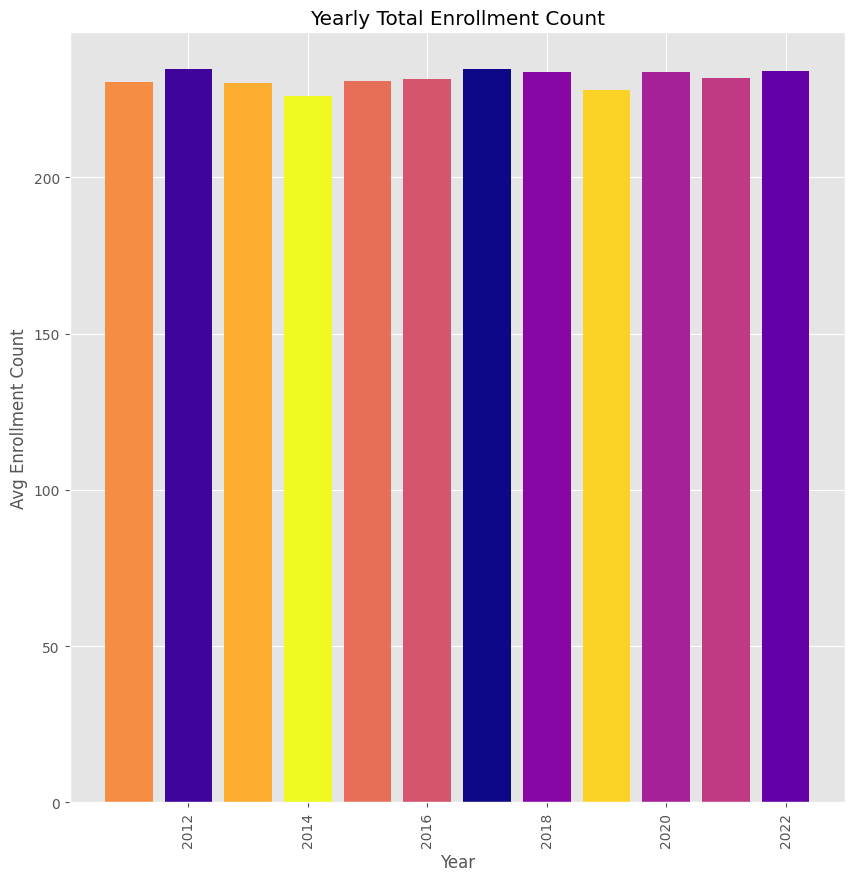

In [1135]:
### Plotting

plt.style.use('ggplot')

plt.figure(figsize =(10,10))

colors = plt.cm.plasma(np.linspace(0, 1, len(avgEnrollmentCount)))

plt.bar(avgEnrollmentCount.index, avgEnrollmentCount.values,color = colors)

plt.xticks(rotation=90)
plt.title("Yearly Total Enrollment Count")
plt.ylabel("Avg Enrollment Count")
plt.xlabel("Year")

plt.show()

### Interpretation

2017 had the highest average enrollment count.

### Checking pre-score and post-score relation with enrollment

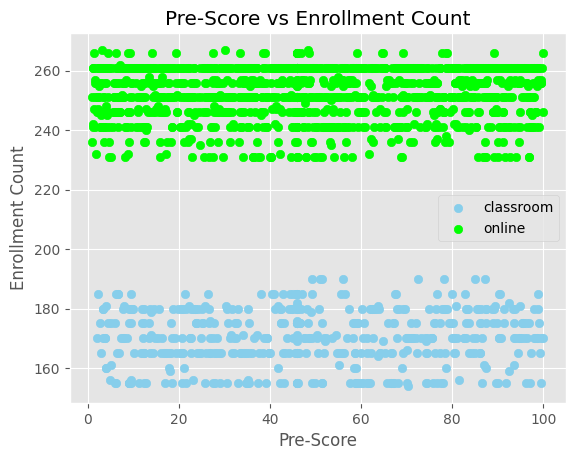

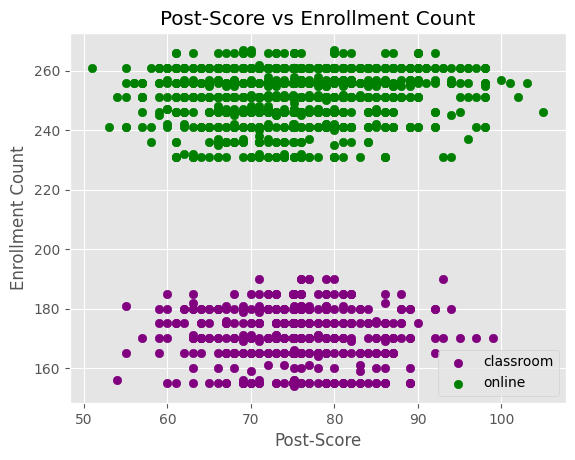

In [1136]:
# Pre Score vs Enrollment Count

colors = {"classroom":"skyblue","online":"lime"}

for course in (data['course_type'].unique()):
    subset = data[data['course_type']==course]
    # plt.plot(enrollmentStats.index, enrollmentStats[course],marker = 'D',label = data['course_type'])
    plt.scatter(subset['pre_score'], subset['enrollment_count'],c = colors[course],label = course)

plt.legend(loc='best')
plt.title('Pre-Score vs Enrollment Count')
plt.xlabel('Pre-Score')
plt.ylabel("Enrollment Count")

plt.show()

# Post Score vs Enrollment Count

colors = {"classroom":"purple","online":"green"}

for course in (data['course_type'].unique()):
    subset = data[data['course_type']==course]
    # plt.plot(enrollmentStats.index, enrollmentStats[course],marker = 'D',label = data['course_type'])
    plt.scatter(subset['post_score'], subset['enrollment_count'],c = colors[course],label = course)

plt.legend(loc='best')
plt.title('Post-Score vs Enrollment Count')
plt.xlabel('Post-Score')
plt.ylabel("Enrollment Count")

plt.show()


### Intepretation

1. The scatter plots show that online courses tend to have a higher enrollment count than classroom courses, especially when the pre-score is high. This is because online courses require more resources and have more students enrolling.

2. The scatter plots also show that online courses tend to have a higher enrollment count than classroom courses, especially when the post-score is high. This is because online courses typically offer a higher quality of education and can accommodate more students.


## Pre-Score Analysis

### What is the average pre_score for all courses?

In [1137]:
print(f"The Average pre_score for all courses is {data['pre_score'].mean()}")

The Average pre_score for all courses is 49.282758276113945


### How many courses have a pre_score higher than 50?

In [1138]:
preScoreGT50 = data[data['pre_score']>50]
print(f"there are {len(preScoreGT50)} courses that have a pre_score higher than 50")

there are 837 courses that have a pre_score higher than 50


### What is the range (difference between maximum and minimum) of pre_score?

In [1139]:
preScoreRange = data['pre_score'].max() - data['pre_score'].min()
print(f"The range of pre score is {preScoreRange}")



The range of pre score is 98.98


### Which department has the highest average pre_score?

In [1140]:
departmentCount = data.groupby('department')['pre_score'].mean().sort_values(ascending=False)
departmentCount

department
Engineering    50.698755
Technology     49.544339
Science        49.090330
Mathematics    48.356956
Name: pre_score, dtype: float64

### Plotting

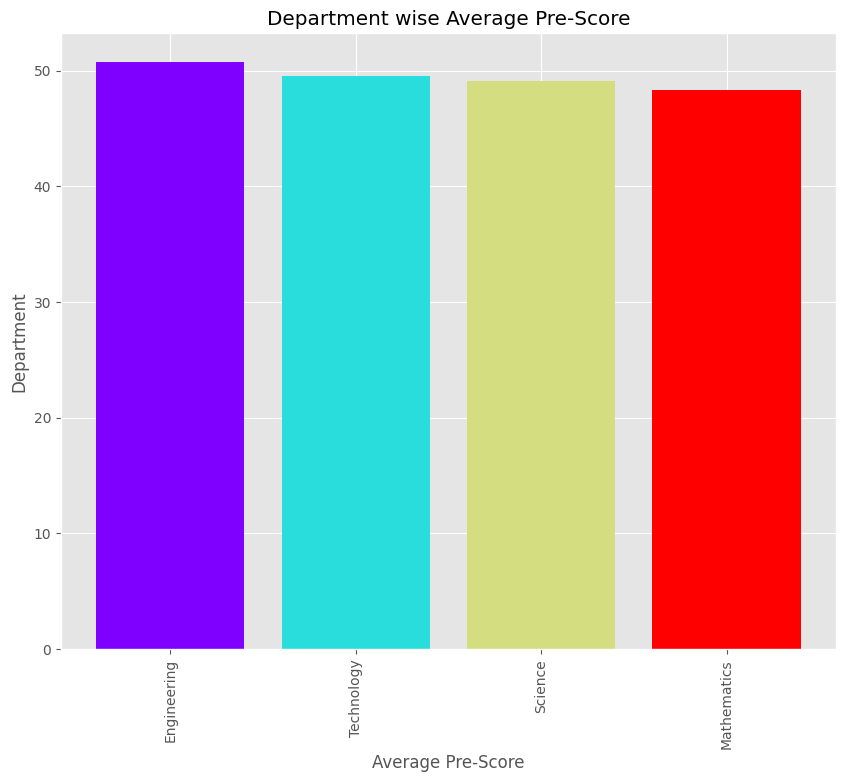

In [1141]:

# Plotting Bar Chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(departmentCount)))

plt.bar(departmentCount.index, departmentCount.values,color = colors)

plt.xticks(rotation=90)

plt.title("Department wise Average Pre-Score")

plt.ylabel("Department")

plt.xlabel("Average Pre-Score")

plt.show()

#### Intepretation

The department with the highest average pre_score is Engineering which is 50.70 .

### What is the distribution of pre_scores for each course type?

In [1197]:
classroomScore = data[data['course_type']=='classroom']['pre_score']
onlineScore = data[data['course_type']=='online']['pre_score']


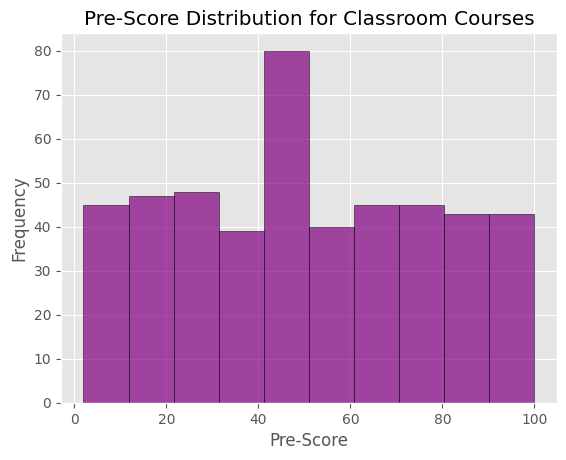

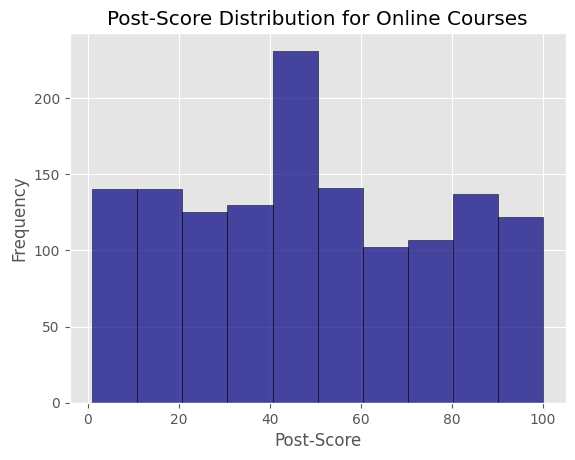

In [1143]:
### Plotting

plt.hist(classroomScore,bins = 10,histtype='barstacked',facecolor = 'purple',alpha=0.7,edgecolor='black')

plt.title("Pre-Score Distribution for Classroom Courses")
plt.xlabel("Pre-Score")
plt.ylabel("Frequency")
plt.show()

plt.hist(onlineScore,bins = 10,histtype='barstacked',facecolor = 'navy',alpha=0.7,edgecolor='black')

plt.title("Post-Score Distribution for Online Courses")
plt.xlabel("Post-Score")
plt.ylabel("Frequency")

plt.show()



## Post-Score Analysis

### What is the average post_score for all courses?

In [1144]:
print(f"The Average post_score for all courses is {data['post_score'].mean()}")

The Average post_score for all courses is 75.2048048048048


### How many courses have a post_score higher than 80?

In [1145]:
postScoreGT80 = data[data['post_score']>80]
print(f"there are {len(postScoreGT80)} courses that have a post_score higher than 80")

there are 435 courses that have a post_score higher than 80


### What is the range (difference between maximum and minimum) of post_score?

In [1146]:
postScoreRange = data['post_score'].max() - data['post_score'].min()

print(f"The range of post score is {postScoreRange}")



The range of post score is 54.0


### Which department has the highest average post_score?

In [1147]:
departmentCount = data.groupby('department')['post_score'].mean().sort_values(ascending=False)
departmentCount


department
Technology     75.458936
Engineering    75.162236
Science        75.093346
Mathematics    74.930284
Name: post_score, dtype: float64

### Plotting

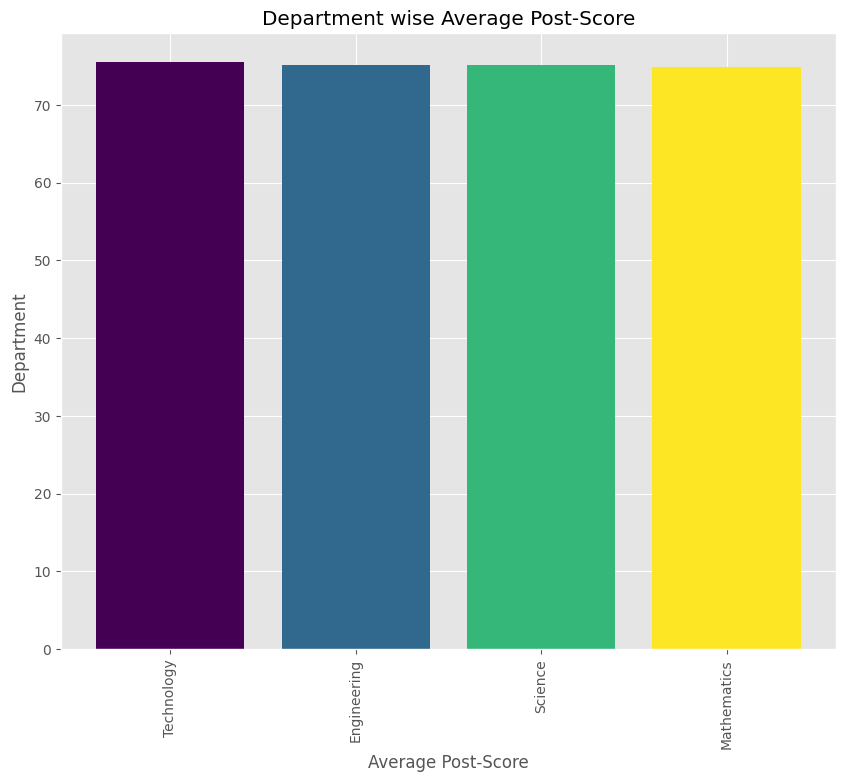

In [1148]:

# Plotting Bar Chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = plt.cm.viridis(np.linspace(0, 1, len(departmentCount)))

plt.bar(departmentCount.index, departmentCount.values,color = colors)

plt.xticks(rotation=90)

plt.title("Department wise Average Post-Score")

plt.ylabel("Department")

plt.xlabel("Average Post-Score")

plt.show()

#### Intepretation

The department with the highest average post score is Technology (75.46) .

### Which course has the highest post_score?

In [1149]:
courseHighestPostScore=data.groupby('course_id')['post_score'].max().sort_values(ascending=False)

print(f"The course with the highest post_score is {courseHighestPostScore.index[0]} with a post score of {courseHighestPostScore.values[0]}")

The course with the highest post_score is 127 with a post score of 105.0


## Pre-Requirement Analysis

### How many courses have a pre_requirement specified?

In [1161]:
coursePreRequirementCount = data[(data['pre_requirement']== 1) | (data['pre_requirement']== 2) | (data['pre_requirement']==3)]
print(f"There are {len(coursePreRequirementCount)} Courses that have a pre_requirement defined.")

There are 1761 Courses that have a pre_requirement defined.


### What is the most common pre_requirement in the dataset?

In [1162]:
preReqCount = data['pre_requirement'].value_counts().sort_index()

print(f"The Most common pre_requirement in dataset is {preReqCount.mode()[0]}. Which means 'None'")

preReqCount

The Most common pre_requirement in dataset is 89. Which means 'None'


pre_requirement
0     89
1    802
2    654
3    305
Name: count, dtype: int64

### Plotting



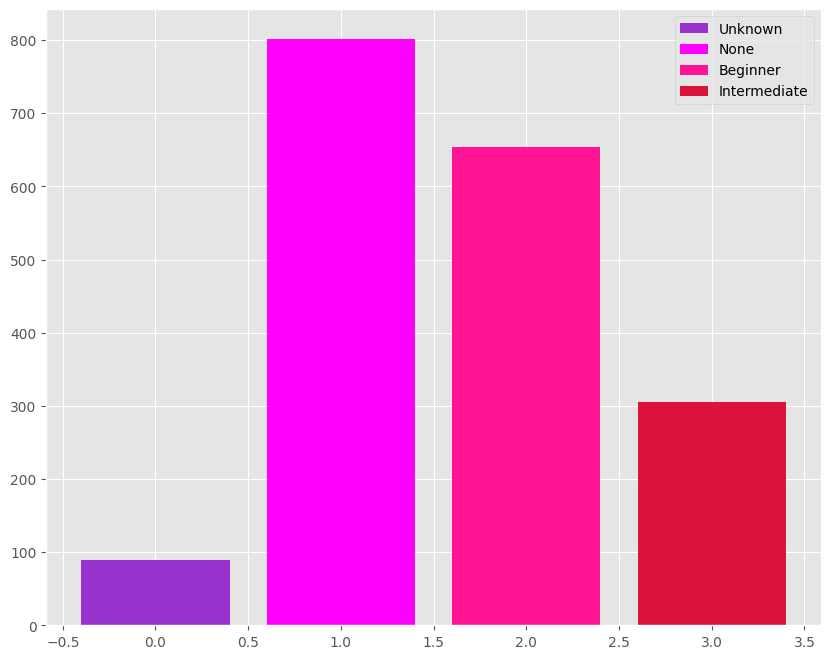

In [1152]:

# Plotting Bar Chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = ['darkorchid','magenta', 'deeppink', 'crimson']

plt.bar(preReqCount.index, preReqCount.values,label=['Unknown',"None","Beginner","Intermediate"],color = colors)

plt.legend()
plt.show()

#### Intepretation

the most common pre_requirement in dataset is "None" , which means most of the courses have None pre_requirement. After this there are 654 beginners and 305 intermediate pre_requirement

### Total Number Of Enrollment According to pre_requirement

In [1200]:


enrollmentStats = data.groupby('pre_requirement')['enrollment_count'].agg(['sum','mean','std'])

enrollmentStats


,sum,mean,std
pre_requirement,,,
0,22062,247.887640,26.646865
1,199568,248.837905,26.199106
2,147283,225.203364,34.888577
3,59483,195.026230,37.421927


### Plotting

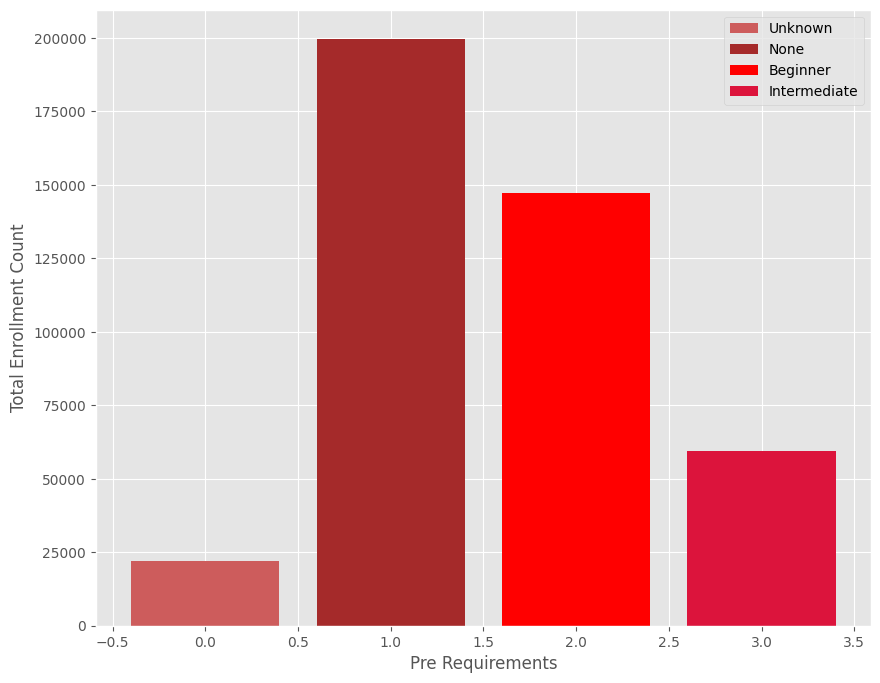

In [1209]:


# Plotting Bar Chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = ['indianred','brown', 'red', 'crimson']

plt.bar(enrollmentStats.index, enrollmentStats['sum'].values,label=['Unknown',"None","Beginner","Intermediate"],color = colors)

plt.xlabel("Pre Requirements")

plt.ylabel("Total Enrollment Count")

plt.legend()

plt.show()


### Interpretation

The Enrollment count for the pre_requirement (199568) is much higher than the other pre_requirements enrollment counts.

### What is the average post_score for courses with a pre_requirement of 'Beginner'?

In [1153]:
avgMeanPostScore = data.groupby('pre_requirement')['post_score'].mean().sort_values(ascending=False)
print(f"The Average Post Score For Courses With A Pre Requirement Of Beginner Is {avgMeanPostScore.loc[2]}")

The Average Post Score For Courses With A Pre Requirement Of Beginner Is 75.05552341332158


### What is the average pre_score for courses with a pre_requirement of 'Beginner'?

In [1154]:
avgMeanPreScore = data.groupby('pre_requirement')['pre_score'].mean().sort_values(ascending=False)
print(f"The Average Pre Score For Courses With A Pre Requirement Of Beginner Is {avgMeanPreScore.loc[2]}")

The Average Pre Score For Courses With A Pre Requirement Of Beginner Is 48.88142952310108


### What is the average post_score for courses with a pre_requirement of 'Intermediate'?

In [1155]:
avgMeanPostScore = data.groupby('pre_requirement')['post_score'].mean().sort_values(ascending=False)
print(f"The Average Post Score For Courses With A Pre Requirement Of Intermediate Is {avgMeanPostScore.loc[3]}")

The Average Post Score For Courses With A Pre Requirement Of Intermediate Is 74.28386156648452


### What is the average pre_score for courses with a pre_requirement of 'Intermediate'?

In [1156]:
avgMeanPreScore = data.groupby('pre_requirement')['pre_score'].mean().sort_values(ascending=False)
print(f"The Average Pre Score For Courses With A Pre Requirement Of Intermediate Is {avgMeanPreScore.loc[3]}")

The Average Pre Score For Courses With A Pre Requirement Of Intermediate Is 48.642017456801064


### How many courses have no pre_requirement specified?

In [1157]:
courseNoPreRequirementCount = data[(data['pre_requirement']== 0)]
print(f"There are {len(courseNoPreRequirementCount)} Courses that have a no pre_requirement defined.")


There are 89 Courses that have a no pre_requirement defined.


## Departmental Analysis

### Which department has the most courses?

In [1163]:
departmentCourseCount = data.groupby('department')['course_id'].count().sort_values(ascending=False)
departmentCourseCount

department
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: course_id, dtype: int64

### Plotting (Count Wise)

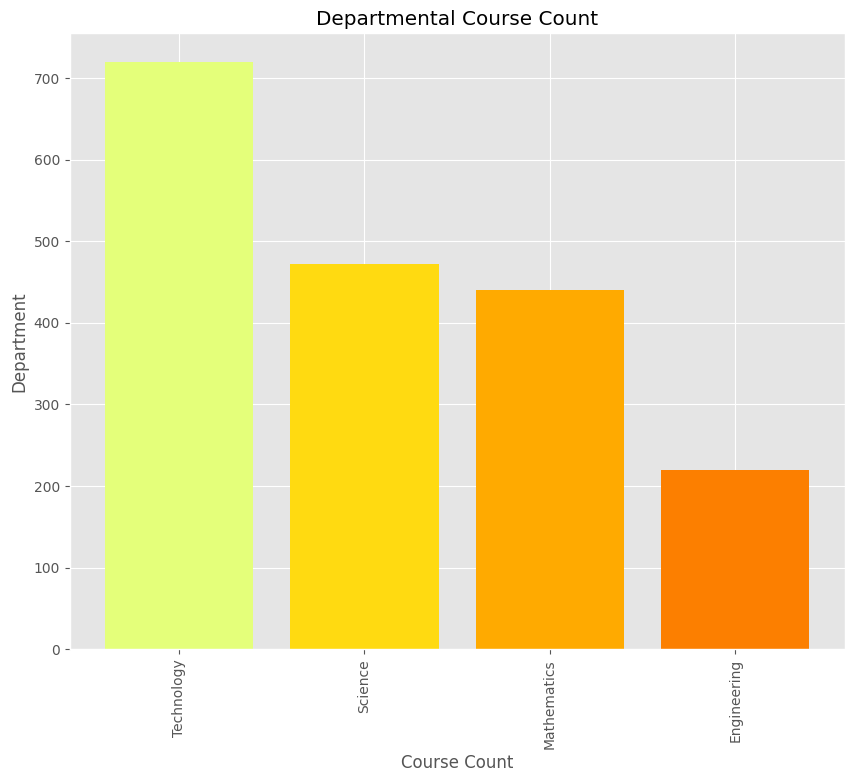

In [1159]:
# Plotting Bar Chart

plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

colors = plt.cm.Wistia(np.linspace(0, 1, len(departmentCourseCount)))

plt.bar(departmentCourseCount.index, departmentCourseCount.values,color = colors)

plt.xticks(rotation=90)

plt.title("Departmental Course Count")
plt.ylabel("Department")
plt.xlabel("Course Count")

plt.show()




### Plotting (Percentage Wise)


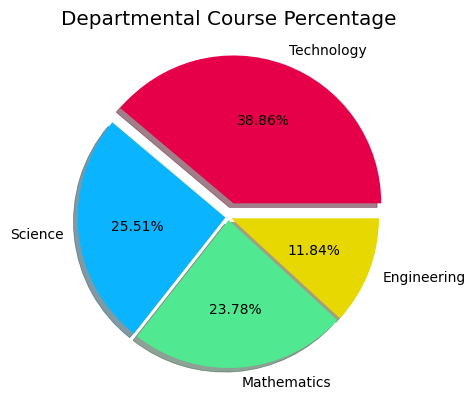

In [1165]:
# Plotting Pie Chart

plt.pie(departmentCourseCount,labels=departmentCourseCount.keys(),autopct="%.2f%%",explode=(0.1,0.02,0.02,0.02),shadow=True,colors=["#e60049", "#0bb4ff", "#50e991", "#e6d800",  "#00bfa0"]
)

plt.title("Departmental Course Percentage")

plt.show() 

### Interpretation

The department with the most courses is Technology, followed by Science.

### What are the mean, median, standard deviation for enrollment_count, pre_score, and post_score for each department?

In [1166]:
departmentStats = data.groupby('department')[['enrollment_count','pre_score','post_score']].agg(['mean','median','std'])
departmentStats

enrollment_count                    pre_score             \
                        mean median        std       mean     median   
department                                                             
Engineering       210.342466  180.0  40.950928  50.698755  46.930000   
Mathematics       234.456818  246.0  32.252463  48.356956  46.047022   
Science           213.076271  241.0  39.505953  49.090330  46.450000   
Technology        248.397775  261.0  26.514941  49.544339  46.047022   

                       post_score                       
                   std       mean     median       std  
department                                              
Engineering  28.496924  75.162236  75.204805  8.450983  
Mathematics  29.180417  74.930284  75.102402  8.543731  
Science      27.100775  75.093346  75.204805  7.723891  
Technology   27.262062  75.458936  75.204805  7.895896

### Plotting

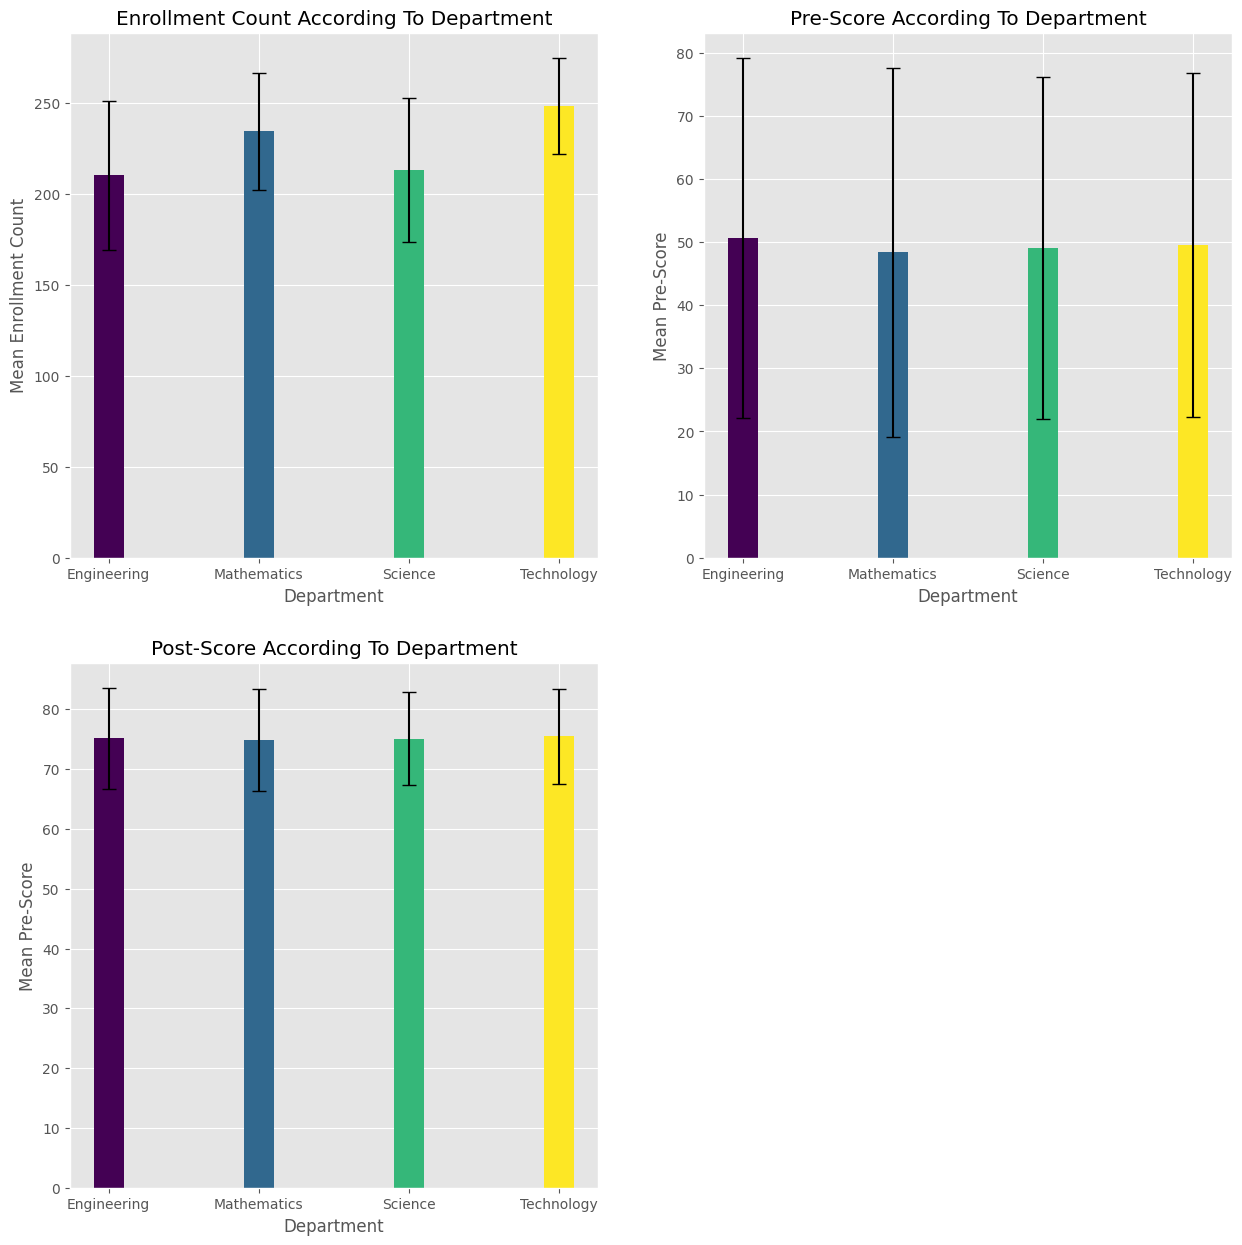

In [1198]:
# Initialization
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

# Data Assignment
enrollmentStats = departmentStats['enrollment_count']
preScoreStats = departmentStats['pre_score']
postScoreStats = departmentStats['post_score']

colors = plt.cm.viridis(np.linspace(0, 1, len(departmentStats)))

plt.bar(enrollmentStats.index,enrollmentStats['mean'],yerr=enrollmentStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Enrollment Count According To Department')
plt.xlabel('Department')
plt.ylabel("Mean Enrollment Count")


plt.subplot(2,2,2)

plt.bar(preScoreStats.index,preScoreStats['mean'],yerr=preScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Pre-Score According To Department')
plt.xlabel('Department')
plt.ylabel("Mean Pre-Score")

plt.subplot(2,2,3)

plt.bar(postScoreStats.index,postScoreStats['mean'],yerr=postScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Post-Score According To Department')
plt.xlabel('Department')
plt.ylabel("Mean Pre-Score")

plt.show()

### Intepretation

#### 1. Enrollment Count
High enrollment count demand for courses offered by the Technology department.Mathematics also shows significant student interest despite slightly lower numbers compared to Technology.
 
2. The mean pre-score for Engineering is generally higher than the mean pre-score for all other department, with a standard deviation of approximately 32. This indicates that Engineering departments have the students with higher level of knowledge.

3. The mean post-score for Technology department is generally higher than the mean post-score for all other department, with a standard deviation of approximately 9. This indicates that students in Technology courses show significant improvement in learning.

## Course Type Analysis

### What are the mean, median, and standard deviation of enrollment_count, pre_score, and post_score for each course_type (online and classroom)?

In [1180]:
courseTypeStats = data.groupby('course_type')[['enrollment_count','pre_score','post_score']].agg(['count','mean','median','std'])
courseTypeStats

enrollment_count                              pre_score  \
                       count        mean median       std     count   
course_type                                                           
classroom                475  170.429474  170.0  9.184052       475   
online                  1375  252.685091  256.0  8.567679      1375   

                                             post_score                        \
                  mean     median        std      count       mean     median   
course_type                                                                     
classroom    50.100867  46.380000  27.664102        475  75.304044  75.204805   
online       49.000139  46.047022  27.881272       1375  75.170522  75.204805   

                       
                  std  
course_type            
classroom    7.406096  
online       8.295746

### Plotting

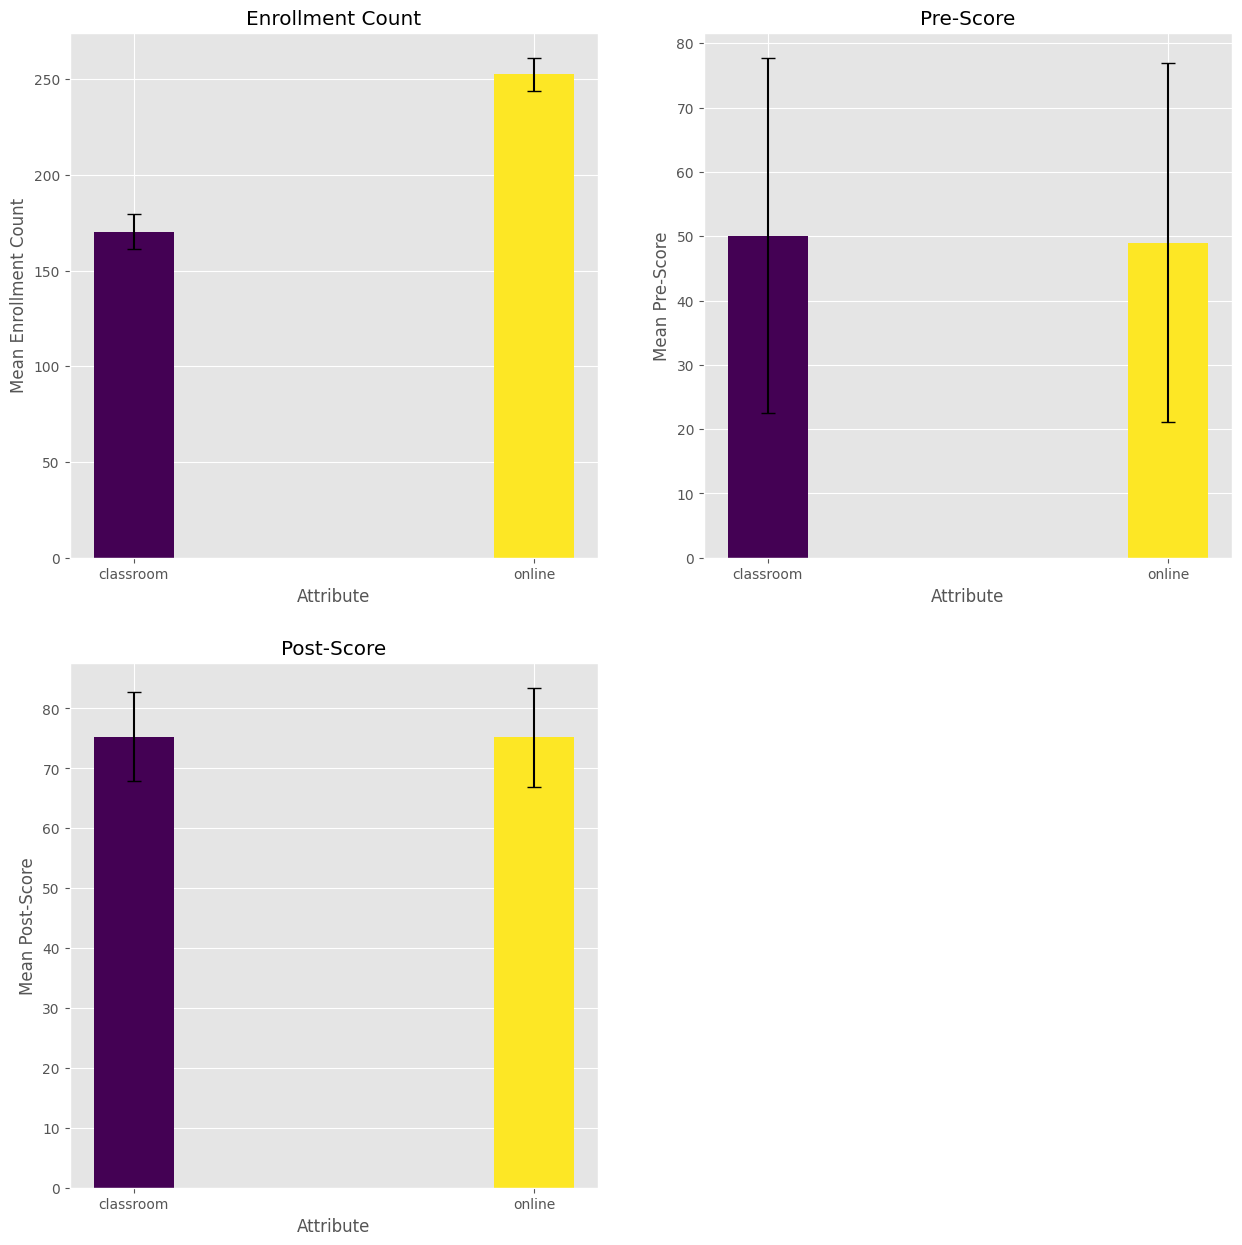

In [1182]:
# Initialization
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

# Data Assignment
enrollmentStats = courseTypeStats['enrollment_count']
preScoreStats = courseTypeStats['pre_score']
postScoreStats = courseTypeStats['post_score']

colors = plt.cm.viridis(np.linspace(0, 1, len(courseTypeStats)))

plt.bar(enrollmentStats.index,enrollmentStats['mean'],yerr=enrollmentStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Enrollment Count')
plt.xlabel('Attribute')
plt.ylabel("Mean Enrollment Count")


plt.subplot(2,2,2)

plt.bar(preScoreStats.index,preScoreStats['mean'],yerr=preScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Pre-Score')
plt.xlabel('Attribute')
plt.ylabel("Mean Pre-Score")

plt.subplot(2,2,3)

plt.bar(postScoreStats.index,postScoreStats['mean'],yerr=postScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Post-Score')
plt.xlabel('Attribute')
plt.ylabel("Mean Post-Score")

plt.show()


### Interpretation

1. The mean enrollment count for online courses is higher than that for classroom courses, with a standard deviation of approximately 9. This indicates that online courses have a wider range of students enrolling.

2. The mean pre-score for classroom courses is also higher than that for online courses, with a standard deviation of approximately 28. This indicates that classroom courses have a wider range of students scoring higher in pre-tests.

3. The mean post-score for classroom courses is also slightly higher than that for online courses, with a standard deviation of approximately 7. This indicates that classroom courses have a wider range of students scoring higher in post-tests.

## Yearly Analysis

### How have enrollment_count, pre_score, and post_score changed over the years? Calculate the mean,median and standard deviation for these metrics for each year.

In [1170]:
yearlyStats = data.groupby('year')[['enrollment_count','pre_score','post_score']].agg(['sum','mean','median','std'])
yearlyStats

enrollment_count                                  pre_score             \
                  sum        mean median        std          sum       mean   
year                                                                          
2011            34109  230.466216  251.0  36.959146  7175.077238  48.480252   
2012            38463  234.530488  251.0  35.834046  7972.016173  48.609855   
2013            38897  230.159763  251.0  37.119553  9358.191281  55.373913   
2014            34344  225.947368  246.0  39.028906  7410.797238  48.755245   
2015            36910  230.687500  251.0  37.287964  8430.299368  52.689371   
2016            37507  231.524691  251.0  36.833046  7514.867238  46.388069   
2017            33550  234.615385  251.0  35.964952  6825.703195  47.732190   
2018            36477  233.826923  251.0  37.104589  7274.237238  46.629726   
2019            33485  227.789116  246.0  38.675013  7310.942130  49.734300   
2020            32696  233.542857  251.0  36.205125  6963.856173  49.741830   
2021            36840  231.698113  247.0  36.231107  7889.131281  49.617178   
2022            35118  234.120000  251.0  36.703587  7047.984259  46.986562   

                              post_score                                  
         median        std           sum       mean     median       std  
year                                                                      
2011  46.600000  26.470410  11104.252853  75.028735  75.000000  8.093139  
2012  46.047022  28.651310  12244.686486  74.662722  75.204805  8.065339  
2013  50.130000  28.247703  12880.891291  76.218292  75.204805  7.400917  
2014  47.380000  28.474816  11421.915315  75.144180  75.204805  8.090075  
2015  48.215000  25.589356  12201.457658  76.259110  76.000000  7.979473  
2016  46.047022  28.118586  12087.276877  74.612820  75.204805  7.401689  
2017  46.047022  28.677877  10658.072072  74.531973  75.204805  7.735643  
2018  46.047022  27.296417  11585.072072  74.263283  75.204805  8.213270  
2019  47.030000  28.320394  10947.252853  74.471108  75.204805  8.630680  
2020  47.825000  28.764508  10427.867267  74.484766  75.000000  8.637555  
2021  47.070000  25.790195  12085.252853  76.007880  75.204805  8.810575  
2022  46.047022  28.975813  11484.891291  76.565942  75.204805  7.615760

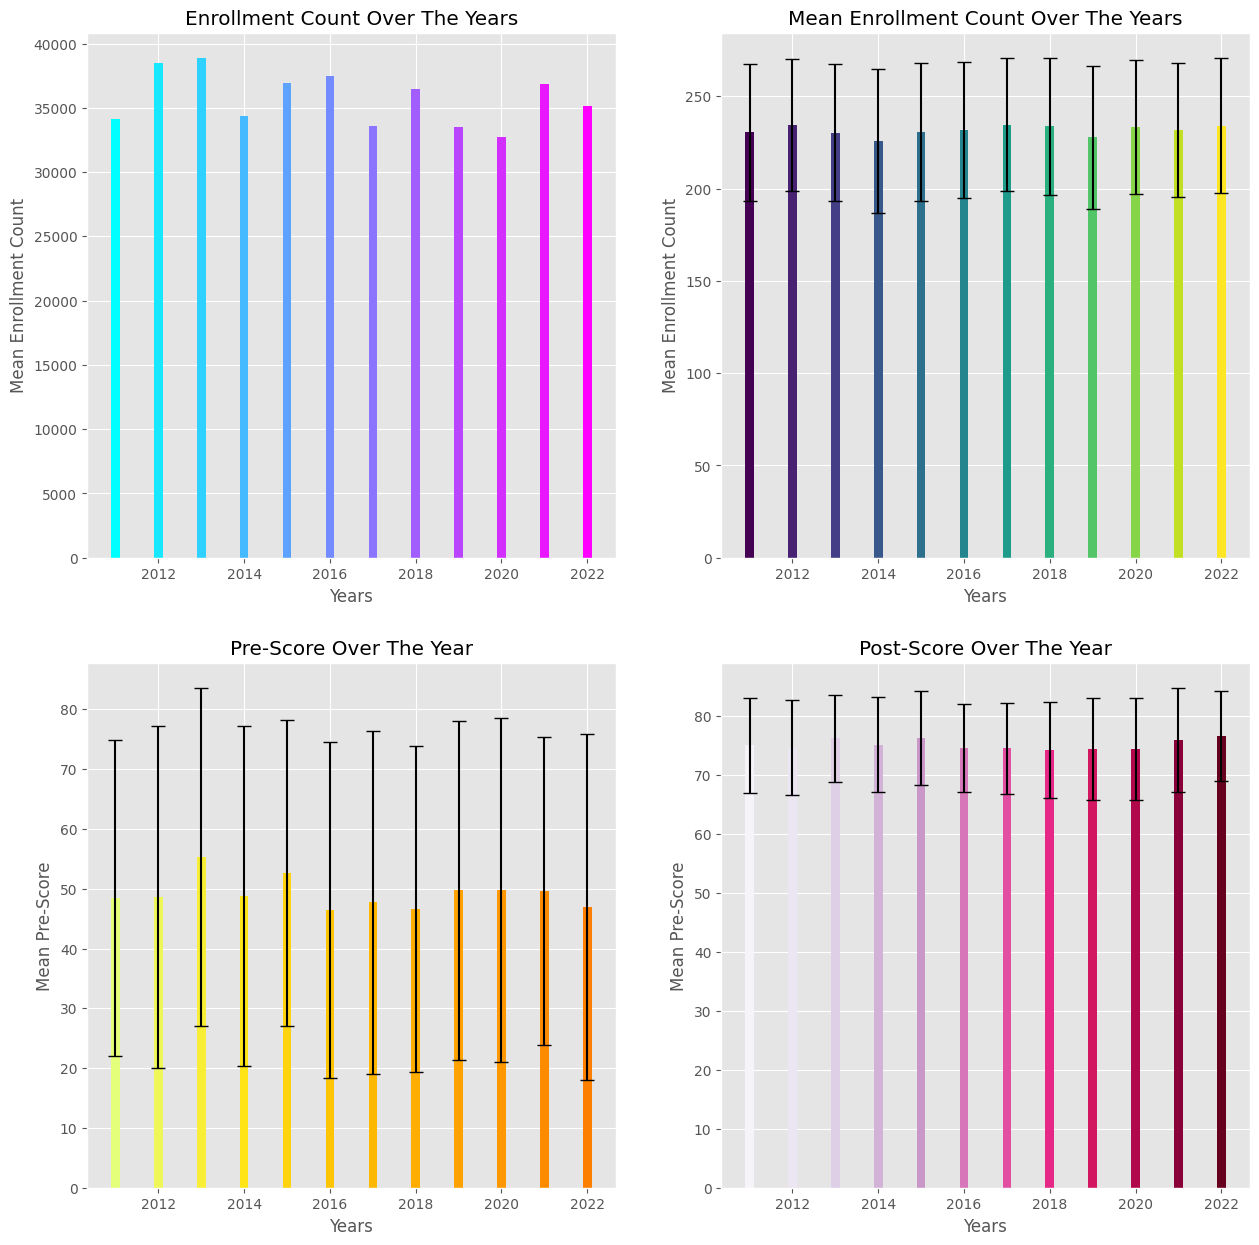

In [1183]:
# Initialization
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

# Data Assignment
enrollmentStats = yearlyStats['enrollment_count']
preScoreStats = yearlyStats['pre_score']
postScoreStats = yearlyStats['post_score']


# Bar plot Enrollment Count Over the years
colors = plt.cm.cool(np.linspace(0, 1, len(yearlyStats)))

plt.bar(enrollmentStats.index,enrollmentStats['sum'],capsize=5,width=0.2,color=colors)


plt.title('Enrollment Count Over The Years')
plt.xlabel('Years')
plt.ylabel("Mean Enrollment Count")


# Bar plot Mean Enrollment Count Over the years

plt.subplot(2,2,2)
colors = plt.cm.viridis(np.linspace(0, 1, len(yearlyStats)))

plt.bar(enrollmentStats.index,enrollmentStats['mean'],yerr=enrollmentStats['std'],capsize=5,width=0.2,color=colors)


plt.title('Mean Enrollment Count Over The Years')
plt.xlabel('Years')
plt.ylabel("Mean Enrollment Count")




# Bar Plot Mean Pre Score Over the years
colors = plt.cm.Wistia(np.linspace(0, 1, len(yearlyStats)))

plt.subplot(2,2,3)

plt.bar(preScoreStats.index,preScoreStats['mean'],yerr=preScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Pre-Score Over The Year')
plt.xlabel('Years')
plt.ylabel("Mean Pre-Score")


# Bar Plot Mean Post Score Over the Year
colors = plt.cm.PuRd(np.linspace(0, 1, len(yearlyStats)))


plt.subplot(2,2,4)

plt.bar(postScoreStats.index,postScoreStats['mean'],yerr=postScoreStats['std'],capsize=5,width=0.2,color=colors)

plt.title('Post-Score Over The Year')
plt.xlabel('Years')
plt.ylabel("Mean Pre-Score")

plt.show()


### Interpretation

1. The mean enrollment count has fluctuated over the years with noticeable variations. There is no clear upward or downward trend, indicating that enrollment counts vary widely year to year.

2. The mean pre-score has different throughout different years. And there is no clear upward or downward trend, indicating that pre_score vary widely year to year

3. Like mean pre-score , The mean post-score has different mean throughout years, And there is no upward and downward trend, indicating that post_score vary widely year to year




### What is the total number of courses offered each year?

In [1184]:
yearlyCount = data.groupby('year')['course_id'].count().sort_values(ascending=False)
yearlyCount


year
2013    169
2012    164
2016    162
2015    160
2021    159
2018    156
2014    152
2022    150
2011    148
2019    147
2017    143
2020    140
Name: course_id, dtype: int64

### Plotting 


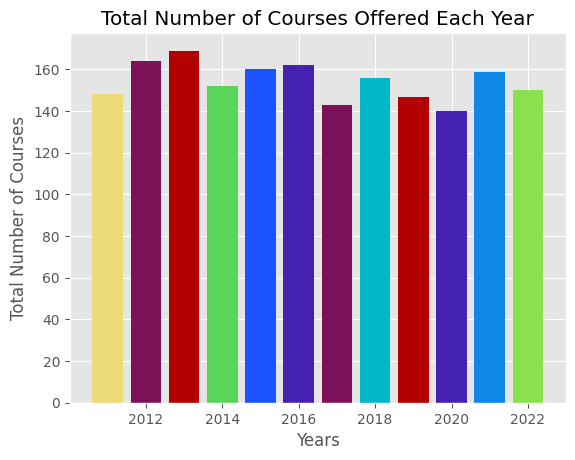

In [1185]:
plt.bar(yearlyCount.index,yearlyCount.values,color=["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"])

plt.title('Total Number of Courses Offered Each Year')
plt.xlabel('Years')
plt.ylabel('Total Number of Courses')

plt.show()



### Interpretataion 

The total number of courses offered each year remain stable over the years, with the most courses offered in 2013.That is why the highest enrollments are in 2013

### count of courses offered each year by department

In [1186]:
courseCountByDept = data.groupby(['year', 'department']).size().unstack()
courseCountByDept 

department,Engineering,Mathematics,Science,Technology
year,,,,
2011,25,32,44,47
2012,14,41,43,66
2013,20,40,47,62
2014,26,39,34,53
2015,18,32,51,59
2016,13,39,44,66
2017,19,35,28,61
2018,20,39,36,61
2019,15,35,44,53


### Plotting

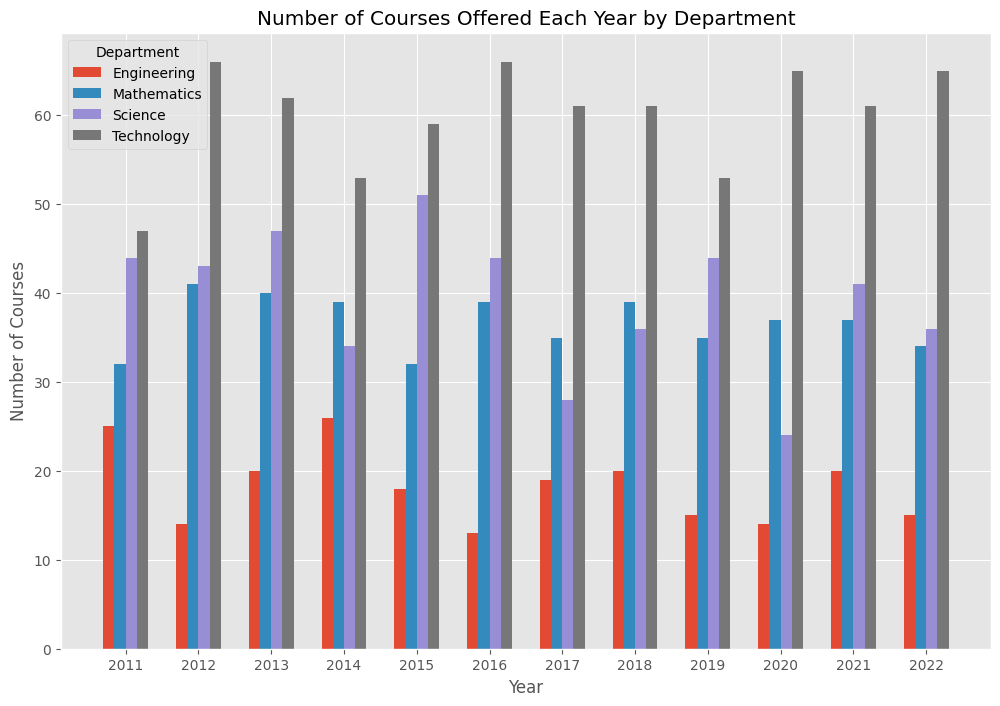

In [1187]:
#NOTE : THIS PLOT IS MADE BY CHATGPT

# Plotting
plt.figure(figsize=(12, 8))

# Define positions for each group of bars
years = courseCountByDept.index
departments = courseCountByDept.columns
bar_width = 0.2
gap = 0.5
positions = np.arange(len(years)) * (len(departments) * bar_width + gap)

# Plot bars for each department
for i, department in enumerate(departments):
    plt.bar(positions + i * bar_width, courseCountByDept[department], width=bar_width, label=department)

# Set the positions and labels of the x-ticks
plt.xticks(positions + bar_width * (len(departments) - 1) / 2, years)

# Adding labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered Each Year by Department')
plt.legend(title='Department')
plt.show()

### Intepretation
The Technology courses are the most offered courses through out all the years

## Correlation Analysis

## Finding Correlation Between Columns

In [1188]:
numericData.corr()

,course_id,year,enrollment_count,pre_score,post_score,pre_requirement
course_id,1.000000,-0.008122,-0.018053,-0.013146,-0.028502,-0.015824
year,-0.008122,1.000000,0.018733,-0.027237,0.011042,-0.031118
enrollment_count,-0.018053,0.018733,1.000000,-0.009967,0.007179,-0.502954
pre_score,-0.013146,-0.027237,-0.009967,1.000000,0.532053,-0.013778
post_score,-0.028502,0.011042,0.007179,0.532053,1.000000,-0.043084
pre_requirement,-0.015824,-0.031118,-0.502954,-0.013778,-0.043084,1.000000


### Plotting Correlation Heatmap

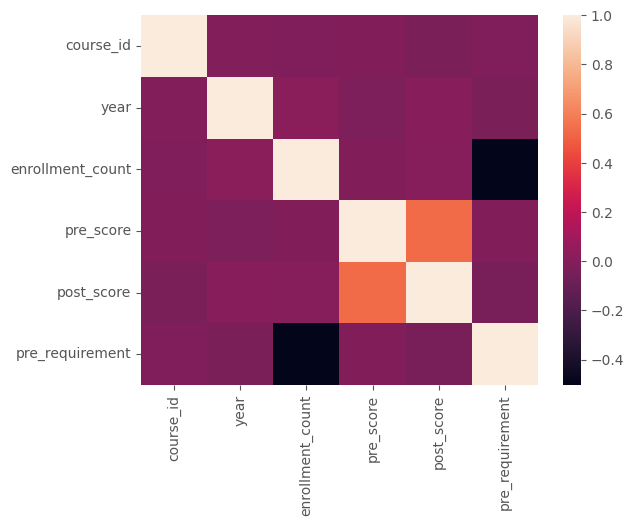

In [1190]:
sns.heatmap(numericData.corr())
plt.show()

### Interpretation 

The correlation heatmap shows that there is a strong positive correlation between pre_score and post_score. This means that as the pre_score increases, the post_score also increases.

However, there is also a strong negative correlation between enrollment_count and pre_requirements. This means that
as the pre_requirements increases, the enrollment_count decreases



## Checking Enrollment Trends Over Time

In [1191]:
enrollmentStats = data.groupby(['year','course_type'])['enrollment_count'].mean().unstack()
enrollmentStats

course_type,classroom,online
year,,
2011,170.589744,251.889908
2012,169.138889,252.921875
2013,170.266667,251.895161
2014,171.820000,252.480392
2015,170.333333,252.169492
2016,171.142857,252.658333
2017,170.818182,253.754545
2018,169.270270,253.899160
2019,168.642857,251.447619


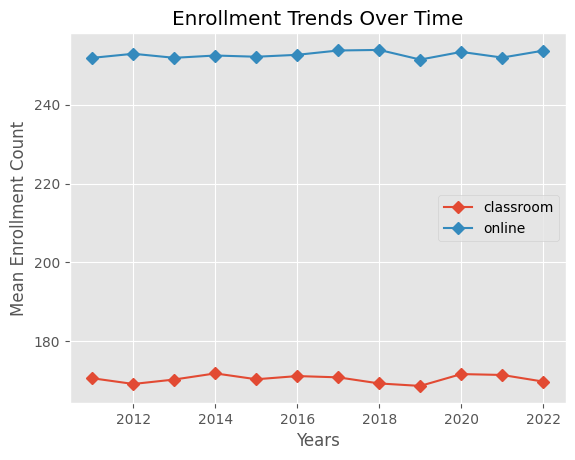

In [1195]:
# Making Line Plots for Enrollment trends over time

for course in enrollmentStats.columns:
    plt.plot(enrollmentStats.index, enrollmentStats[course],marker = 'D',label = course)


plt.title('Enrollment Trends Over Time')
plt.xlabel('Years')
plt.ylabel("Mean Enrollment Count")
plt.legend()
plt.show()



### Interpretation

 The enrollment trends for both online and classroom courses have been relatively stable over the years. However, online courses have been consistently higher in enrollment than classroom courses.

## Summerizing Insights 

### 1. Overall Trends

- The Analysis of enrollment count across the years reveals that 2013 had the highest total enrollments. Which means that in 2013 experienced higher student interest in offered courses.

### 2. Department-wise Insights

- Technology courses are the most offered courses through out all the years. 
- Technology department consistently had the highest average enrollment count per course (248.40).This indicates a strong preference for courses in the Technology department.
- In terms of pre-scores, Engineering students had the highest average (50.70)
- In terms of post-scores, Tech students had the highest average (75.46).




### 3 Pre-Requirement Insights

- The 'None' pre-requirement courses had a significant number of enrollments (199568) which is 46.5% of total enrollments, suggesting they are accessible and attract a wide audience.

### 4 Course Type Insights

- The average enrollment count for online courses (252.69)
was higher than for classroom courses (170.43) across all years. This shows growing interest in online courses

### 5 Correlation Insights

- The strongest correlations were observed between pre-scores and post-scores (0.532), indicating that students with higher initial scores tend to perform well after the course as well.

- There was also a negative correlation between enrollment count and pre-requirements (-0.503), suggesting that courses with fewer or simpler pre-requirements tend to attract more students.



### Recommedation and Suggestions

- Due to higher enrollment count in online courses , introduce more and improve online courses.

- As Analysis shows Technology and Mathematics courses tend to get higher average enrollment. Investment can be good in these type of courses.

- As Correlation shows there is a negative correlation between enrollment count and pre-requirements which suggest making courses more accessible (by reducing pre-requirements) could get higher enrollment.

- Understanding the yearly fluctuations in enrollment over the years can be helpful in better planning and resource allocation. For Example, ensuring adequate faculty and support staff during years with historically higher enrollments (e.g., 2013 and 2012) can enhance student experience and learning outcomes.

